In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

In [ ]:
tick = ['CIPLA.NS', 'AAPL', 'MSFT', 'TSLA', 'GOOGL']
price_data = web.get_data_yahoo(tick,
                           start = '2015-04-01',
                           end = '2017-03-31')['Adj Close']

In [ ]:
log_ret = np.log(price_data/price_data.shift(1))

we will calculate the covariance matrix.

In [ ]:
cov_mat = log_ret.cov() * 252
print(cov_mat)

Symbols   CIPLA.NS      AAPL      MSFT      TSLA     GOOGL
Symbols                                                   
CIPLA.NS  0.061046  0.000339  0.001312  0.008324  0.004867
AAPL      0.000339  0.057180  0.029112  0.025693  0.025015
MSFT      0.001312  0.029112  0.056608  0.026593  0.034231
TSLA      0.008324  0.025693  0.026593  0.148001  0.027321
GOOGL     0.004867  0.025015  0.034231  0.027321  0.055912


 we will jump into the for loop and simulate the portfolio returns and risk on 5000 random portfolios.

In [ ]:
# Simulating 5000 portfolios
num_port = 5000
# Creating an empty array to store portfolio weights
all_wts = np.zeros((num_port, len(price_data.columns)))
# Creating an empty array to store portfolio returns
port_returns = np.zeros((num_port))
# Creating an empty array to store portfolio risks
port_risk = np.zeros((num_port))
# Creating an empty array to store portfolio sharpe ratio
sharpe_ratio = np.zeros((num_port))

In [ ]:
for i in range(num_port):
  wts = np.random.uniform(size = len(price_data.columns))
  wts = wts/np.sum(wts)
  
  # saving weights in the array
  
  all_wts[i,:] = wts
  
  # Portfolio Returns
  
  port_ret = np.sum(log_ret.mean() * wts)
  port_ret = (port_ret + 1) ** 252 - 1
  
  # Saving Portfolio returns
  
  port_returns[i] = port_ret
  
  
  # Portfolio Risk
  
  port_sd = np.sqrt(np.dot(wts.T, np.dot(cov_mat, wts)))
  
  port_risk[i] = port_sd
  
  # Portfolio Sharpe Ratio
  # Assuming 0% Risk Free Rate
  
  sr = port_ret / port_sd
  sharpe_ratio[i] = sr

We calculate and distibute weights on basis on MIN VARIANCE, MAX SHARPE RATIO & MIN RISK

In [ ]:
names = price_data.columns
min_var = all_wts[port_risk.argmin()]
print(min_var)

[0.37324816 0.28612487 0.17124825 0.03967173 0.12970698]


In [ ]:
max_sr = all_wts[sharpe_ratio.argmax()]
print(max_sr)

[0.01706827 0.03134381 0.55676518 0.0533032  0.34151953]


In [ ]:
print(sharpe_ratio.max())

1.192647955897052


In [ ]:
print(port_risk.min())

0.15631186472959055


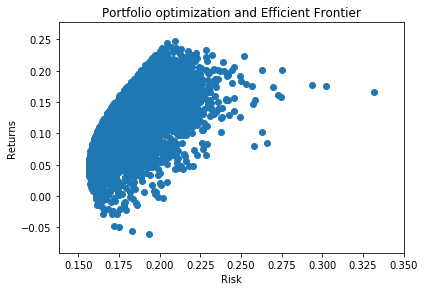

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Risk')
ax1.set_ylabel("Returns")
ax1.set_title("Portfolio optimization and Efficient Frontier")
plt.scatter(port_risk, port_returns)
plt.show();

# How did you choose the stocks?
### Firstly i seen the long run returns of some of my favorite companies stocks in which i wanna invest.The stocks i choose are some of the biggest brand in their respective field with a stable and good return  that would allow profit margins to remain high.























# What is the impact of increasing the number of stocks in the portfolio?
### few stocks increase the company risk but on the other hand, too many stocks will make it difficult for you to achieve returns greater than market returns. So increasing stocks will just give you almost same return as to compensate for market risk



# Why are calculating the weights by optimization and not giving equal weightage to every stock?
### All the stocks don't contribute equally towards the growth of our portfolio and hence every stock has a different weightage.By optimizing the weights we get maximum return and reduces market risk to minimum.



# Which optimization techniques are used by Mutual Funds currently?
### i am not sure of these answere very well but i think Monte Carlo optimization is used in recent times.
###  Monte Carlo simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables.



# Which parameters are you using to check the accuracy of your model?
###  by calculating actual and expected return value , varaince and volatility we can calculate accuracy but i really have no clue how to do that therefore not done in code part